In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [19]:
colors = ["#fcb0f3","#e79df1","#d28aee","#bc77ec","#a764e9","#9251e7","#7d3ee4","#672be2","#5218df","#3d05dd"]
sns.set_style('darkgrid')
fontDict = {
    "fontname": "Arial",
    "fontsize":"14"
}

In [30]:
def plot_series(time, series, format="-", start=0, end=None, label=None, clr=0):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format (string) - line style when plotting the graph
      start (int) - first time step to plot
      end (int) - last time step to plot
      label (list of strings)- tag for the line
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(25, 10))

    # Plot the time series data, Label the x-axis, Label the y-axis
    plt.plot(time[start:end], series[start:end], format, color=colors[clr])
    plt.xlabel("Time", fontdict=fontDict)
    plt.ylabel("Value", fontdict=fontDict)

    if label:
      plt.legend(fontsize=14, labels=label)

    # Draw the graph on screen
    plt.show()

In [5]:
def trend(time, slope=0) -> list:
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope
    series = slope * time

    return series

365


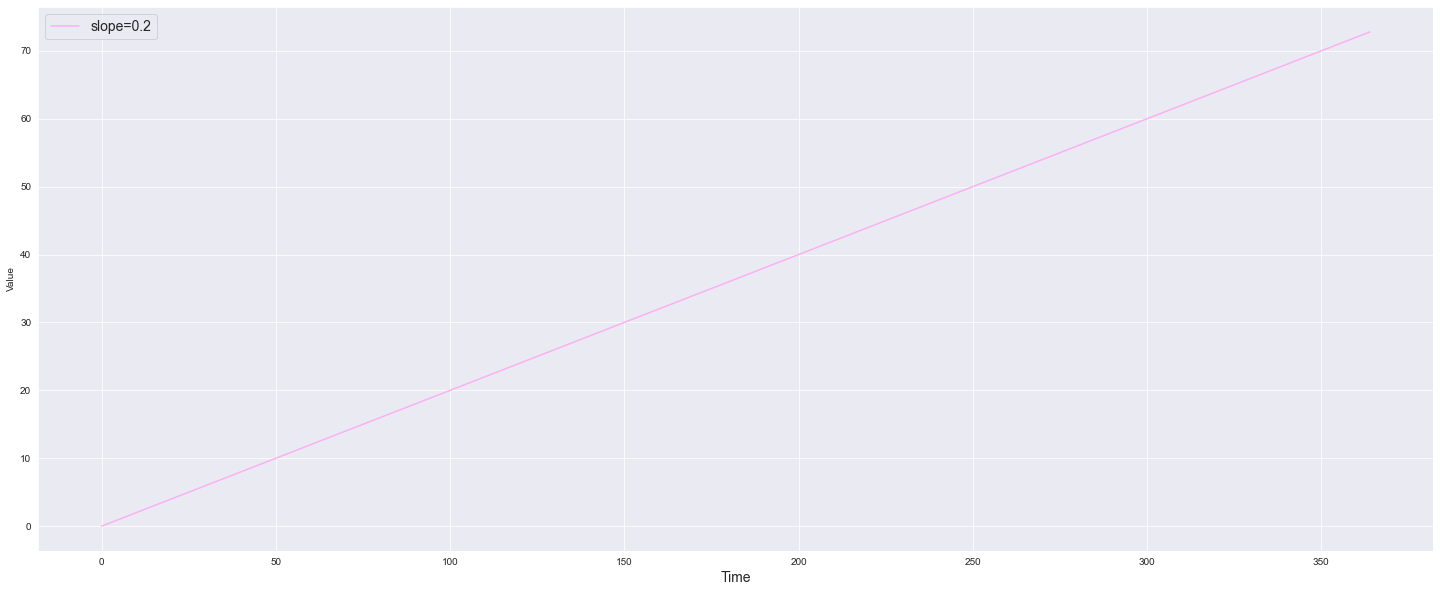

In [21]:
# Generate time steps. Assume 1 per day for one year (365 days)
time = np.arange(365)

# Define the slope (You can revise this)
slope = 0.2

# Generate measurements with the defined slope
series = trend(time, slope)

# Plot the results
plot_series(time, series, label=[f'slope={slope}'])

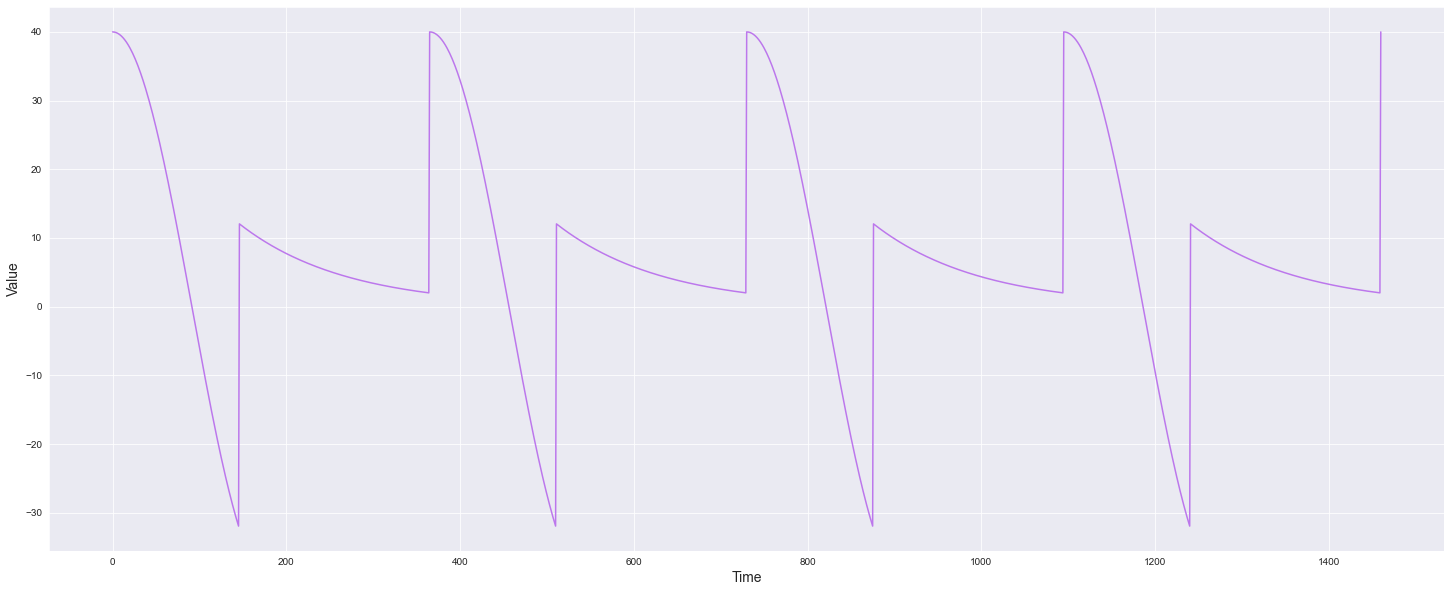

In [31]:
def seasonalPattern(seasonTime):
    dataPattern = np.where(
        seasonTime < 0.4,
        np.cos(seasonTime * 2 * np.pi),
        1 / np.exp(3 * seasonTime),
    )

    return dataPattern


def seasonality(time, period, amplitude=1, phase=0):
    seasonTime = ((time + phase) % period) / period

    dataPattern = amplitude * seasonalPattern(seasonTime=seasonTime)

    return dataPattern

time = np.arange(4 * 365 + 1)

period = 365
amplitude = 40

series = seasonality(time, period, amplitude)


plot_series(time, series, clr=3)

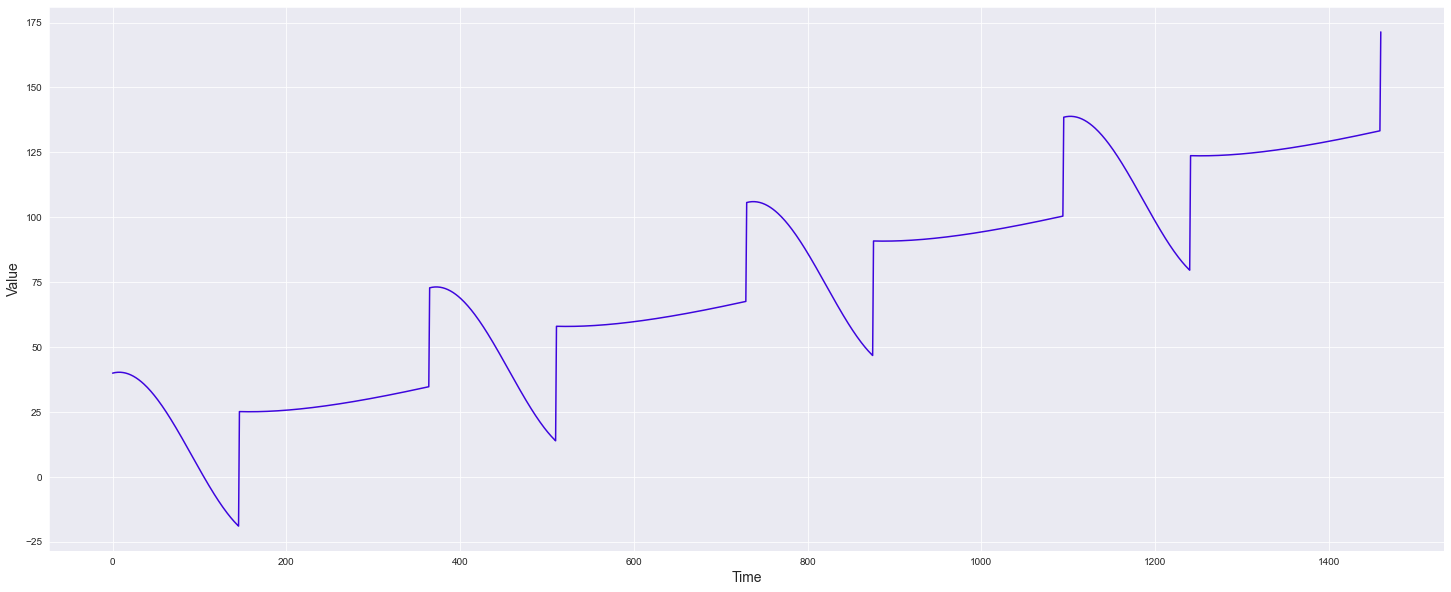

In [35]:
slope = 0.09
period = 365
amplitude = 40

series = trend(time, slope) + seasonality(time, period, amplitude=amplitude)
plot_series(time, series, clr=9)